In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime

/home/odyssey/.local/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
raw = pd.read_csv('data/CAvideos.csv')
raw.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [3]:
raw['trending_date'] = pd.to_datetime(raw['trending_date'], format='%y.%d.%m')
raw['publish_time'] = pd.to_datetime(raw['publish_time'], format='%Y-%m-%d')

In [4]:
category = pd.read_json('data/CA_category_id.json')


In [5]:
def days(data):
    res = data['trending_date'].date() - data['publish_time'].date()
    return res

In [6]:
days_to = raw.apply(days, axis=1).value_counts()

<AxesSubplot:>

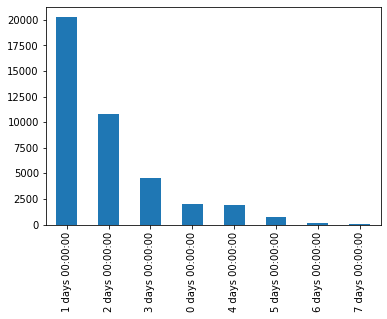

In [7]:
days_to[days_to > 50].plot(kind='bar')

In [8]:
"""Видно что сложно попасть в тренды в тот же день когда публикуется видео, а проще всего через день после публикации"""

'Видно что сложно попасть в тренды в тот же день когда публикуется видео, а проще всего через день после публикации'

In [9]:
def li(data, param_1, param_2):
    return int(data[param_1]) / int(data[param_2])

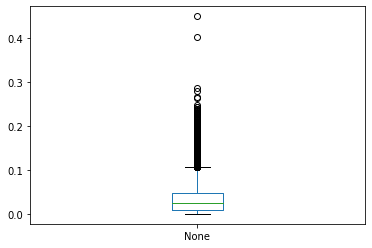

In [10]:
a = raw.apply(li, args=('likes', 'views'), axis=1).plot(kind='box')
#plt.show()
#b = raw.apply(li, args=('comment_count', 'views'), axis=1).plot(kind='box')

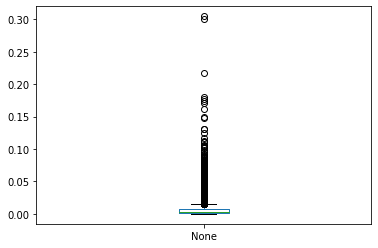

In [11]:
b = raw.apply(li, args=('comment_count', 'views'), axis=1).plot(kind='box')

In [ ]:
"""Люди намного чаще ставят лайки чем пишут комментарии, есть много видео в которых один человек оставляет больше одного комментария, что может быть накруткой"""

<AxesSubplot:ylabel='Frequency'>

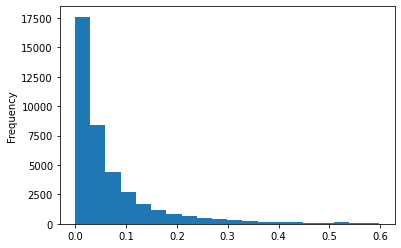

In [14]:
dis = raw[(raw.likes > 0)].apply(li, args=('dislikes', 'likes'), axis=1)
dis[dis < 0.6].plot(kind='hist', bins=20)

In [ ]:
"""В тренды попадают видео у которых больше лайков чем дизлайков"""